In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
lifestyle_data = pd.read_csv('L&R.csv')
rel_cols = ['What percentage of your high school friends do you still keep in touch/are still friends with?',
           'What percentage of your current friends are in SYDE?'
           ]
df = lifestyle_data[rel_cols].dropna().rename(columns={'What percentage of your high school friends do you still keep in touch/are still friends with?': 'highschool',
                                                      'What percentage of your current friends are in SYDE?' : 'syde'
                                                     })
df.head()

,highschool,syde
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [4]:
#group_highschool = df.groupby('highschool')['highschool'].count()
#group_syde = df.groupby('syde')['syde'].count()
#group_highschool

highschool
0.0      1
1.0      7
2.0      5
3.0      9
4.0      8
5.0     11
6.0     11
7.0      6
8.0     10
9.0     17
10.0     6
Name: highschool, dtype: int64

In [5]:
#group_syde

syde
0.0      8
1.0     19
2.0      8
3.0     10
4.0      3
5.0      9
6.0      6
7.0     11
8.0     10
9.0      5
10.0     2
Name: syde, dtype: int64

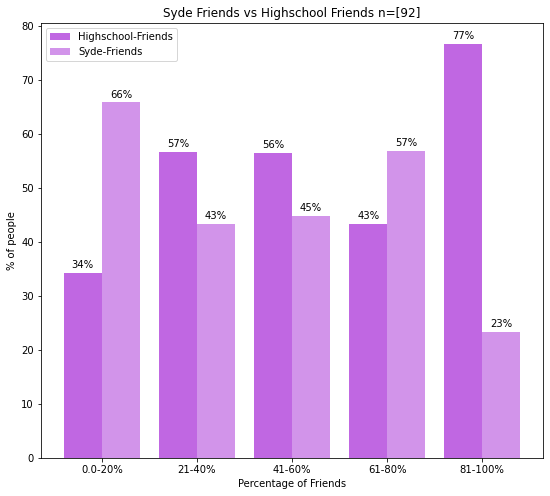

In [28]:
labels = ['0.0-20%','21-40%','41-60%','61-80%','81-100%']
highschool_percent =[13/(25+13),17/(17+13),22/(22+17),16/(16+21),23/30]
highschool = [i * 100 for i in highschool_percent]
rounded_hs = ['34%','57%','56%','43%','77%']
syde_percent = [25/(25+13),13/30,17/38,21/37,7/30]
syde = [s*100 for s in syde_percent]
rounded_syde = ['66%','43%','45%','57%','23%']
x=np.arange(len(labels))
width = 0.4
fig,ax = plt.subplots(figsize=(9,8))
rects1 = plt.bar(x- 0.2, highschool, 0.4, color='#C067E2', label='Highschool-Friends')
rects2 = plt.bar(x+ 0.2, syde, 0.4, color='#d294ea', label='Syde-Friends')

plt.xticks(x, labels)
plt.xlabel("Percentage of Friends")
plt.ylabel('% of people')
plt.title("Syde Friends vs Highschool Friends n=[92]")
ax.bar_label(rects1, padding=3, labels=rounded_hs)
ax.bar_label(rects2, padding=3, labels=rounded_syde)

plt.legend()
plt.show()